In [1]:
import numpy as np
from cascade_driver import CascadeDriver

MCEqRun::set_interaction_model(): DPMJETIII191
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [2]:
%load_ext autoreload
%autoreload 2
cas_driver = CascadeDriver(threshold_energy = 1e-1, 
                           mceq_decaying_pdgs=[111])

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [4]:
%autoreload 2

cas_driver.start_accumulate()

for i in range(2000):
    cas_driver.run(pdg = 2212, energy = 1e3, 
                mceq_decaying_pdgs = [111, -211, 211],
                threshold_energy = 1e-1)
    
cas_driver.stop_accumulate()    

1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 4 number of decays = 0
4 Number of inter = 6 number of decays = 0
5 Number of inter = 7 number of decays = 0
6 Number of inter = 7 number of decays = 90
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 3 number of decays = 0
4 Number of inter = 3 number of decays = 86
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 2 number of decays = 0
4 Number of inter = 4 number of decays = 0
5 Number of inter = 4 number of decays = 63
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 2 number of decays = 0
4 Number of inter = 2 number of decays = 54
1 Number of inter = 0 number of decays = 0
2 Number of inter = 1 number of decays = 0
3 Number of inter = 1 number of decays = 54
1 Number of inter = 0 number of decays = 0
2 Numb

In [5]:
from cascade_analysis import CascadeAnalysis

cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()

Number of runs = 2000
Initial state:
  $p$(2212) with energy = 1.000e+03

Final state:
  Number of final particles = 320932
  Number of interactions = 3
  Number of decays = 56
  Max number of generations = 12

  Max xdepth = 1011.4568036341914
  Exectution time = 14.80 s
  Exectution time per run = 0.01 s
  Size of cascade_driver object = 29.12 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+03 GeV
  Energy in final particles = 1.00571e+03 GeV
  Relative loss(+)/gain(-) -5.714e-03


{22: 116236, 14: 43814, -13: 43814, 13: 42453, -14: 42453, 2212: 10052, 2112: 8942, 321: 3483, 130: 3080, -321: 2640, -2112: 1279, -2212: 1140, 11: 765, -11: 762, -12: 10, 12: 7, 3122: 2}


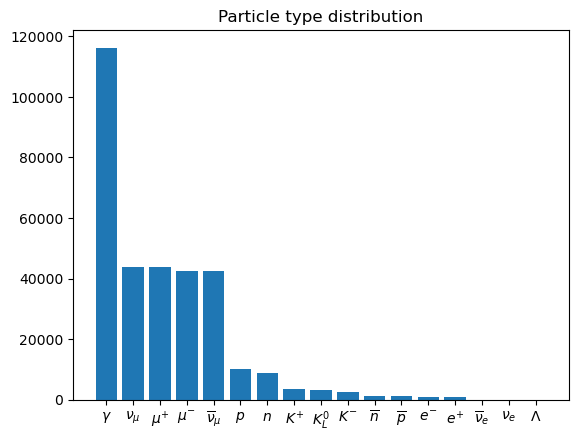

In [6]:
cascade_analysis.plot_pid(from_ = 0)

Min = 9.38e+08 eV, Max = 2.83e+11 eV


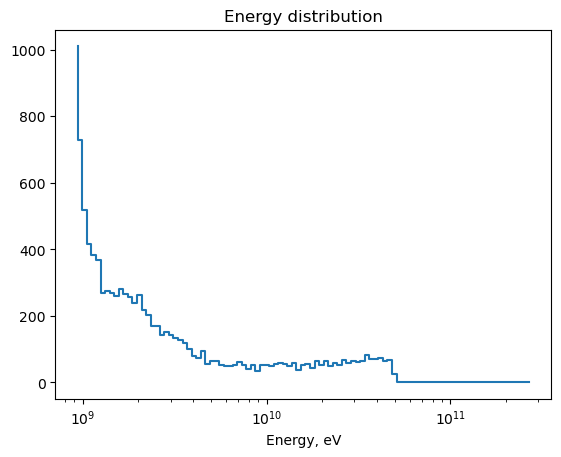

In [7]:
cascade_analysis.plot_energy(2212)

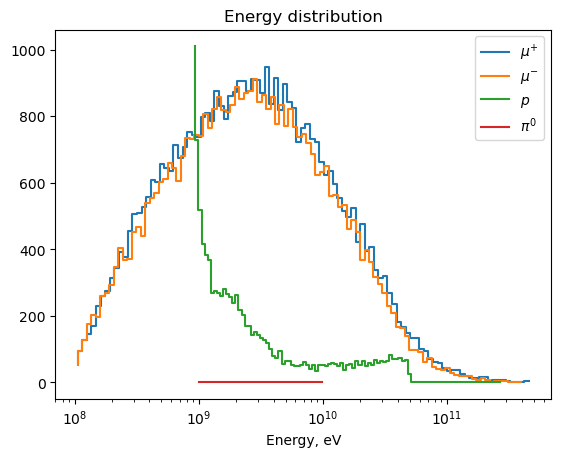

In [8]:
cascade_analysis.plot_energy_list(pids = [-13, 13, 2212, 111])

[-13, 13, 2212]
Min = 0.00 g/cm2, Max = 1011.46 g/cm2


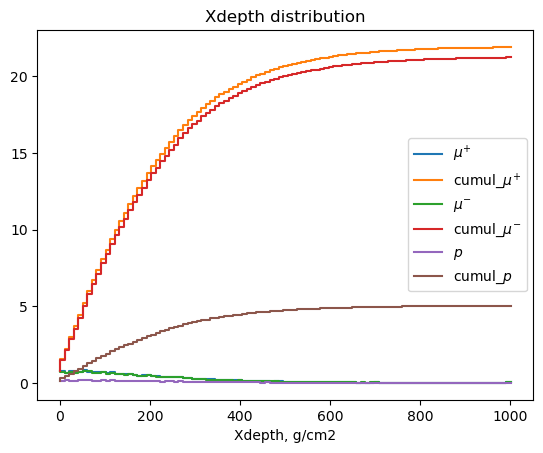

In [29]:
cascade_analysis.plot_xdepth_list(nbins = 100,  pids = [-13, 13, 2212], 
                                  xrange = (0, 1012), per_run = True)

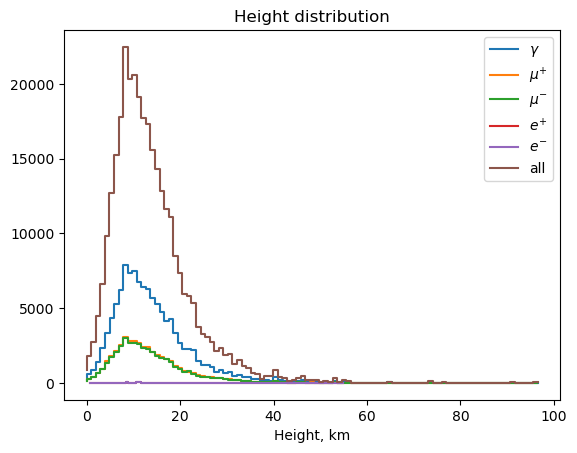

In [10]:
cascade_analysis.plot_height_list(pids = [22, -13, 13, -11, 11], all_pids=True)

In [11]:
cascade_analysis.digitize()

100

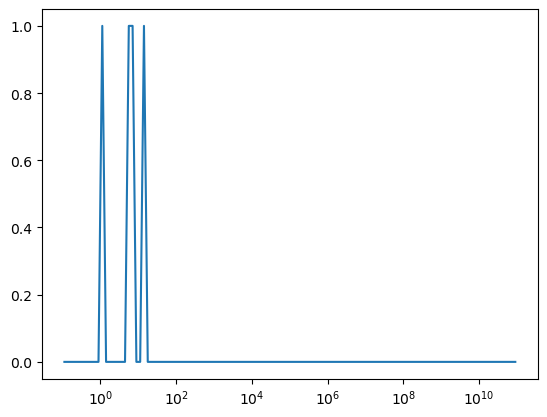

In [12]:
import matplotlib.pylab as plt
plt.semilogx(cascade_analysis.egrid, cascade_analysis.hist_dict[22][0][99])



len(cascade_analysis.hist_dict[22][0])